Model Accuracy: 26.59%


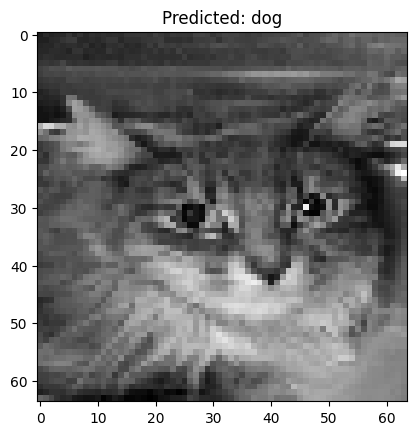

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize to (64x64)
            images.append(img.flatten())  # Flatten image to 1D array
            labels.append(label)
    return images, labels

# Load dataset
dogs_images, dogs_labels = load_images_from_folder("/content/drive/MyDrive/cats_dogs_light/train/", "dog") ## Image data is taken from https://zenodo.org/records/5226945
cats_images, cats_labels = load_images_from_folder("/content/drive/MyDrive/cats_dogs_light/train/", "cat") ## Image data is taken from https://zenodo.org/records/5226945

# Combine data
X = np.array(dogs_images + cats_images)
y = np.array(dogs_labels + cats_labels)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)  # Converts 'dog' -> 0, 'cat' -> 1

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Example prediction
sample_img = X_test[0].reshape(64, 64)
predicted_label = le.inverse_transform([svm_model.predict([X_test[0]])[0]])[0]
plt.imshow(sample_img, cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()
